# LU Decomposition

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Any matrix $A$ has decomposition of the form $A = PLU$ where

* $P$ is a permutation matrix
* $L$ is unit lower triangular
* $U$ is upper triangular

This is called the LU decomposition with partial pivoting.

## Example 1

Find a decomposition $A = LU$ for

$$
A = \begin{bmatrix} 2 & 1 & 1 \\ 2 & 0 & 2 \\ 4 & 3 & 4 \end{bmatrix}
$$

using Gaussian elimination without pivoting and compare to the LU decomposition with partial pivoting computed by `scipy.linalg.lu`.

First, let us comute by hand:

$$
\begin{align*}
\begin{bmatrix} \phantom{-}1 & 0 & 0 \\ -1 & 1 & 0 \\ -2 & 0 & 1 \end{bmatrix}
\begin{bmatrix} 2 & 1 & 1 \\ 2 & 0 & 2 \\ 4 & 3 & 4 \end{bmatrix}
&=
\left[ \begin{array}{rrr} 2 & 1 & 1 \\ 0 & -1 & \phantom{+}1 \\ 0 & 1 & 2 \end{array} \right] \\
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix}
\left[ \begin{array}{rrr} 2 & 1 & 1 \\ 0 & -1 & \phantom{+}1 \\ 0 & 1 & 2 \end{array} \right]
&=
\left[ \begin{array}{rrr} 2 & 1 & 1 \\ 0 & -1 & \phantom{+}1 \\ 0 & 0 & 3 \end{array} \right]
\end{align*}
$$

Therefore $A = LU$ with

$$
L = \left[ \begin{array}{rrr} 1 & 0 & 0 \\ 1 & 1 & 0 \\ 2 & -1 & \phantom{+}1 \end{array} \right]
\hspace{10mm}
U = \left[ \begin{array}{rrr} 2 & 1 & 1 \\ 0 & -1 & \phantom{+}1 \\ 0 & 0 & 3 \end{array} \right]
$$

$$
\begin{align*}
L_2 L_1 A &= U \\
A &= L_1^{-1} L_2^{-1} U \\
A &= LU
\end{align*}
$$

where $L = L_1^{-1} L_2^{-1}$.

Let's verify the result:

In [3]:
L = np.array([[1,0,0],[1,1,0],[2,-1,1]])
print(L)

[[ 1  0  0]
 [ 1  1  0]
 [ 2 -1  1]]


In [4]:
U = np.array([[2,1,1],[0,-1,1],[0,0,3]])
print(U)

[[ 2  1  1]
 [ 0 -1  1]
 [ 0  0  3]]


In [5]:
L @ U

array([[2, 1, 1],
       [2, 0, 2],
       [4, 3, 4]])

Now compute with `scipy.linalg.lu`:

In [6]:
la.lu?

In [7]:
A = np.array([[2,1,1],[2,0,2],[4,3,4]])
p,l,u = la.lu(A)

In [8]:
print(p)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [9]:
print(l)

[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.5        0.33333333 1.        ]]


In [10]:
print(u)

[[ 4.   3.   4. ]
 [ 0.  -1.5  0. ]
 [ 0.   0.  -1. ]]


In [11]:
p@l@u

array([[2., 1., 1.],
       [2., 0., 2.],
       [4., 3., 4.]])

With partial pivoting the matrix $L$ always has entries with absolute value less than or equal to 1 in the lower left. That is, $|\ell_{i,j}| \leq 1$ for $i > j$ where $\ell_{i,j}$ is the entry of $L$ in row $i$ and column $j$.

## Example 2

The $N$ by $N$ matrix

$$
A = 
\left[
\begin{array}{cccccccc}
2 & -1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & & 0 & 0  & 0 \\
0 & -1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
\vdots &  & \vdots &  & \ddots & & \vdots & \\
0 & 0 & 0 & 0 & \cdots & -1 & 2 & -1 \\
0 & 0 & 0 & 0 & \cdots & 0 & -1 & 2 \\
\end{array}
\right]
$$

is symmetric and positive definite. Compute the solution of the system $A \mathbf{x} = \mathbf{b}$ for

$$
\mathbf{b} = \left[ \begin{array}{r} 1 \\ \vdots \\ 1 \end{array} \right]
$$

by computing the Cholesky decomposition and using the function `scipy.linalg.solve_triangular`.

In [12]:
N = 100
A1 = 2*np.eye(N)
A2 = np.diag(-np.ones(N-1),1)
A = A1 + A2 + A2.T

In [13]:
evals,evecs = la.eig(A)

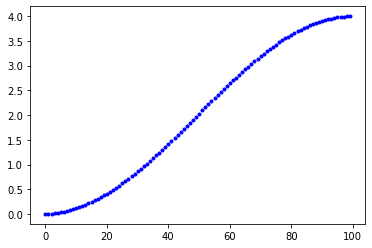

In [14]:
plt.plot(np.sort(evals.real),'b.')
plt.show()

In [15]:
U = la.cholesky(A)

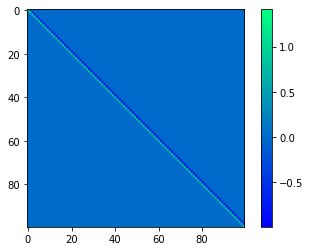

In [16]:
plt.imshow(U,cmap='winter')
plt.colorbar()
plt.show()

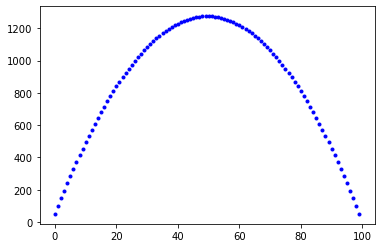

In [17]:
b = np.ones([N,1])
y = la.solve_triangular(U.T,b,lower=True)
x = la.solve_triangular(U,y,lower=False)
plt.plot(x,'b.')
plt.show()

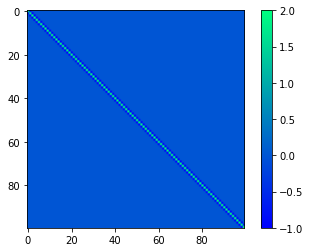

In [18]:
plt.imshow(A,cmap='winter')
plt.colorbar()
plt.show()

In [19]:
A.nbytes

80000

In [20]:
8*100*100

80000

In [21]:
8*(100 + 2*99)

2384